<a href="https://colab.research.google.com/github/andrenp2/FinancialStudyPython/blob/master/Invest03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 - Analisando Ações com Python no collab.


**3.1 - Importando Bibliotecas**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import seaborn as sns

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override() 


Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


*** 3.2 - Importando dados do mercado (YahooFinance) ***

Criaremos uma lista contendo as siglas de cada empresa na bolsa de valores 
Nesse caso vamos analisar a IBOVESPA em relacao ao DOLAR AMERICANO

*nota: vamos importar apenas os dados de fechamento, logo, definimos na propria variavel de importacao carteira. Que é composta pelo comando web_get_data_yahoo {odne pegara os dados} (tickers{lista de acoes que desejo} e ["Close"] {apenas a coluna que desejo trabalhar}



In [24]:
tickers = ["^BVSP","USDBRL=X"]



carteira = web.get_data_yahoo(tickers, start="2015-01-01")["Close"]

In [25]:
carteira = carteira.dropna() # remove todos os NaN dos dados.
carteira



Symbols,^BVSP,USDBRL=X
Date,,
2015-01-02,48512.0,2.65320
2015-01-05,47517.0,2.69120
2015-01-06,48001.0,2.70310
2015-01-07,49463.0,2.69660
2015-01-08,49943.0,2.68080
...,...,...
2020-06-15,92376.0,5.15321
2020-06-16,93531.0,5.24360
2020-06-17,95547.0,5.22790


In [26]:
carteira.columns = ["IBOV","DOLAR"]
carteira

,IBOV,DOLAR
Date,,
2015-01-02,48512.0,2.65320
2015-01-05,47517.0,2.69120
2015-01-06,48001.0,2.70310
2015-01-07,49463.0,2.69660
2015-01-08,49943.0,2.68080
...,...,...
2020-06-15,92376.0,5.15321
2020-06-16,93531.0,5.24360
2020-06-17,95547.0,5.22790


*** 3.3 - Resultados ***


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd60c105208>,
      dtype=object)

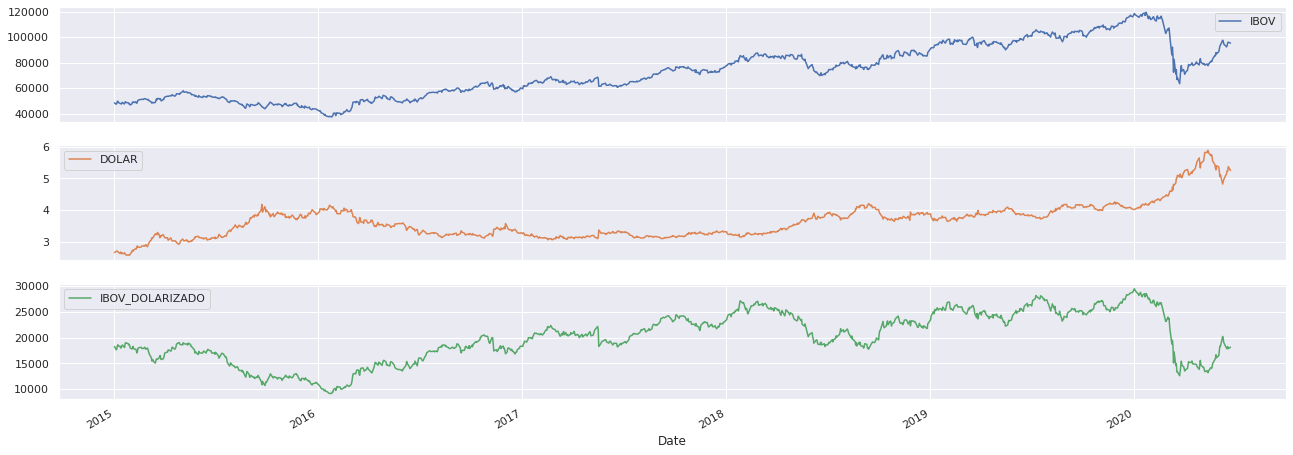

In [36]:
sns.set()
carteira.plot(subplots=True,figsize=(22,8))

Como podemos notar, existe alguns dados faltantes no grafico, isso deve-se ao fato dos NaN (not a number) como dados. Podemos entao, fazer uma limpa nesse dados errados utilizando um simples comando do python. { variavel.dropna() } 

Aqui o problema ja foi corrigido com o dropna()

carteira = carteira.dropna()



Para mudar o nome das colunas dos dados que eu importei basta utilizar 

variavel.columns = ["nome1","nome2"]

*** 3.4 - Calculando correlação entre os dois ***

para calcular a correlacao entre as duas basta utilizar o comando 

variavel.corr()


In [29]:
carteira.corr()

,IBOV,DOLAR
IBOV,1.000000,0.427352
DOLAR,0.427352,1.000000


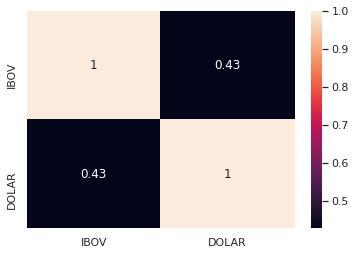

In [31]:
sns.heatmap(carteira.corr(),annot = True)

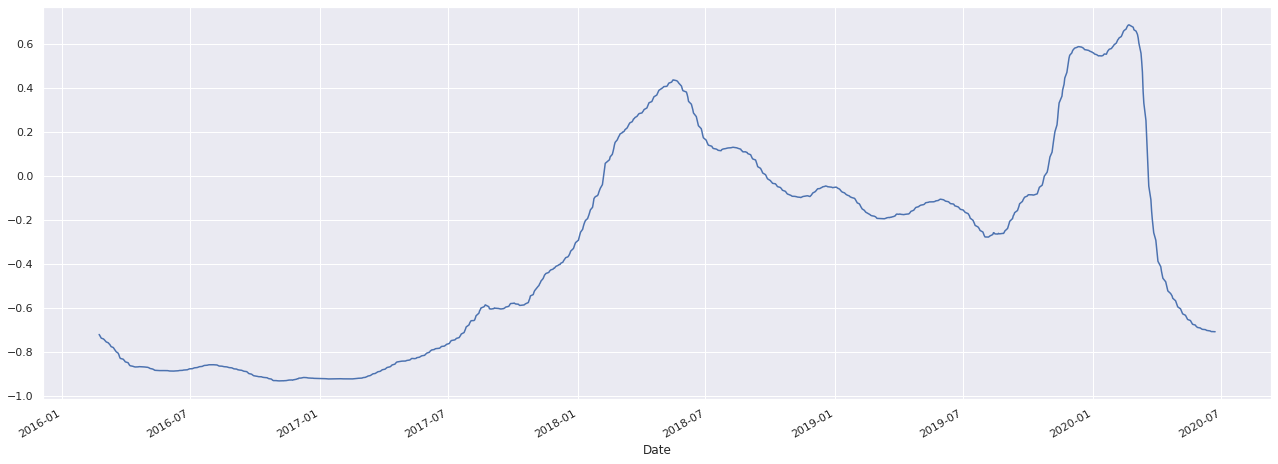

In [32]:
carteira["DOLAR"].rolling(252).corr(carteira["IBOV"]).plot(figsize=(22,8))

In [35]:
carteira["IBOV_DOLARIZADO"] = (carteira["IBOV"] / carteira["DOLAR"])
carteira

,IBOV,DOLAR,IBOV_DOLARIZADO
Date,,,
2015-01-02,48512.0,2.65320,18284.336509
2015-01-05,47517.0,2.69120,17656.435673
2015-01-06,48001.0,2.70310,17757.759832
2015-01-07,49463.0,2.69660,18342.728149
2015-01-08,49943.0,2.68080,18629.886871
...,...,...,...
2020-06-15,92376.0,5.15321,17925.913572
2020-06-16,93531.0,5.24360,17837.173303
2020-06-17,95547.0,5.22790,18276.363259
